In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

plt.rcParams['figure.figsize'] = (7, 7)

In [2]:
df = pd.read_csv('ames_housing_trimmed_processed.csv')
X, y = df.iloc[:, :-1], df.iloc[:, -1]

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiatethe XGBRegressor: xg_reg
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', seed=123, n_estimators=10)

# Fit the regressor to the training set
xg_reg.fit(X_train, y_train)

# Predict the labels of the test set: preds
preds = xg_reg.predict(X_test)

# compute the rmse: rmse
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 28106.463641


In [4]:
# Convert the training and testing sets into DMatrixes: DM_train, DM_test
DM_train = xgb.DMatrix(data=X_train, label=y_train)
DM_test = xgb.DMatrix(data=X_test, label=y_test)

# Create the parameter dictionary: params
params = {"booster":"gblinear", "objective":"reg:squarederror"}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=DM_train, num_boost_round=5)

# Predict the labels of the test set: preds
preds = xg_reg.predict(DM_test)

# Compute and print the RMSE
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 45315.218981


In [5]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:squarederror", "max_depth":4}

# Perform cross-valdiation: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4,
                    num_boost_round=5, metrics='rmse', as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Extract and print final boosting round metric
print((cv_results['test-rmse-mean']).tail(1))

   train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0    141767.533478      429.451090   142980.434934    1193.795492
1    102832.547530      322.472076   104891.395389    1223.157368
2     75872.617039      266.474211    79478.938743    1601.345019
3     57245.651780      273.624239    62411.921348    2220.150063
4     44401.298519      316.423620    51348.279619    2963.378136
4    51348.279619
Name: test-rmse-mean, dtype: float64


In [6]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:squarederror", "max_depth":4}

# Perform cross-valdiation: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4,
                    num_boost_round=5, metrics='mae', as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Extract and print final boosting round metric
print((cv_results['test-mae-mean']).tail(1))

   train-mae-mean  train-mae-std  test-mae-mean  test-mae-std
0   127343.480012     668.306786  127633.999275   2404.005913
1    89770.056424     456.963854   90122.501070   2107.909841
2    63580.789280     263.405054   64278.558741   1887.567534
3    45633.156501     151.883868   46819.168555   1459.818435
4    33587.090044      86.998100   35670.647207   1140.607311
4    35670.647207
Name: test-mae-mean, dtype: float64


In [7]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

reg_params = [1, 10, 100]

# Create the initial parameter dictionary for varying l2 strength: params
params = {"objective":"reg:squarederror", "max_depth":3}

# Create an empty list for storing rmses as a function of l2 complexity
rmses_l2 = []

# Iterate over reg_params
for reg in reg_params:
    # Update l2 strength
    params['lambda'] = reg
    
    # Pass this updated param dictionary into cv
    cv_results_rmse = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2,
                            num_boost_round=5, metrics='rmse', as_pandas=True, seed=123)
    
    # Append best rmse (final round) to rmses_l2
    rmses_l2.append(cv_results_rmse['test-rmse-mean'].tail(1).values[0])
    
# Loot at best rmse per l2 param
print("Best rmse as a function of l2:")
print(pd.DataFrame(list(zip(reg_params, rmses_l2)), columns=["l2", "rmse"]))

Best rmse as a function of l2:
    l2          rmse
0    1  52275.357003
1   10  57746.063828
2  100  76624.627811


In [8]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

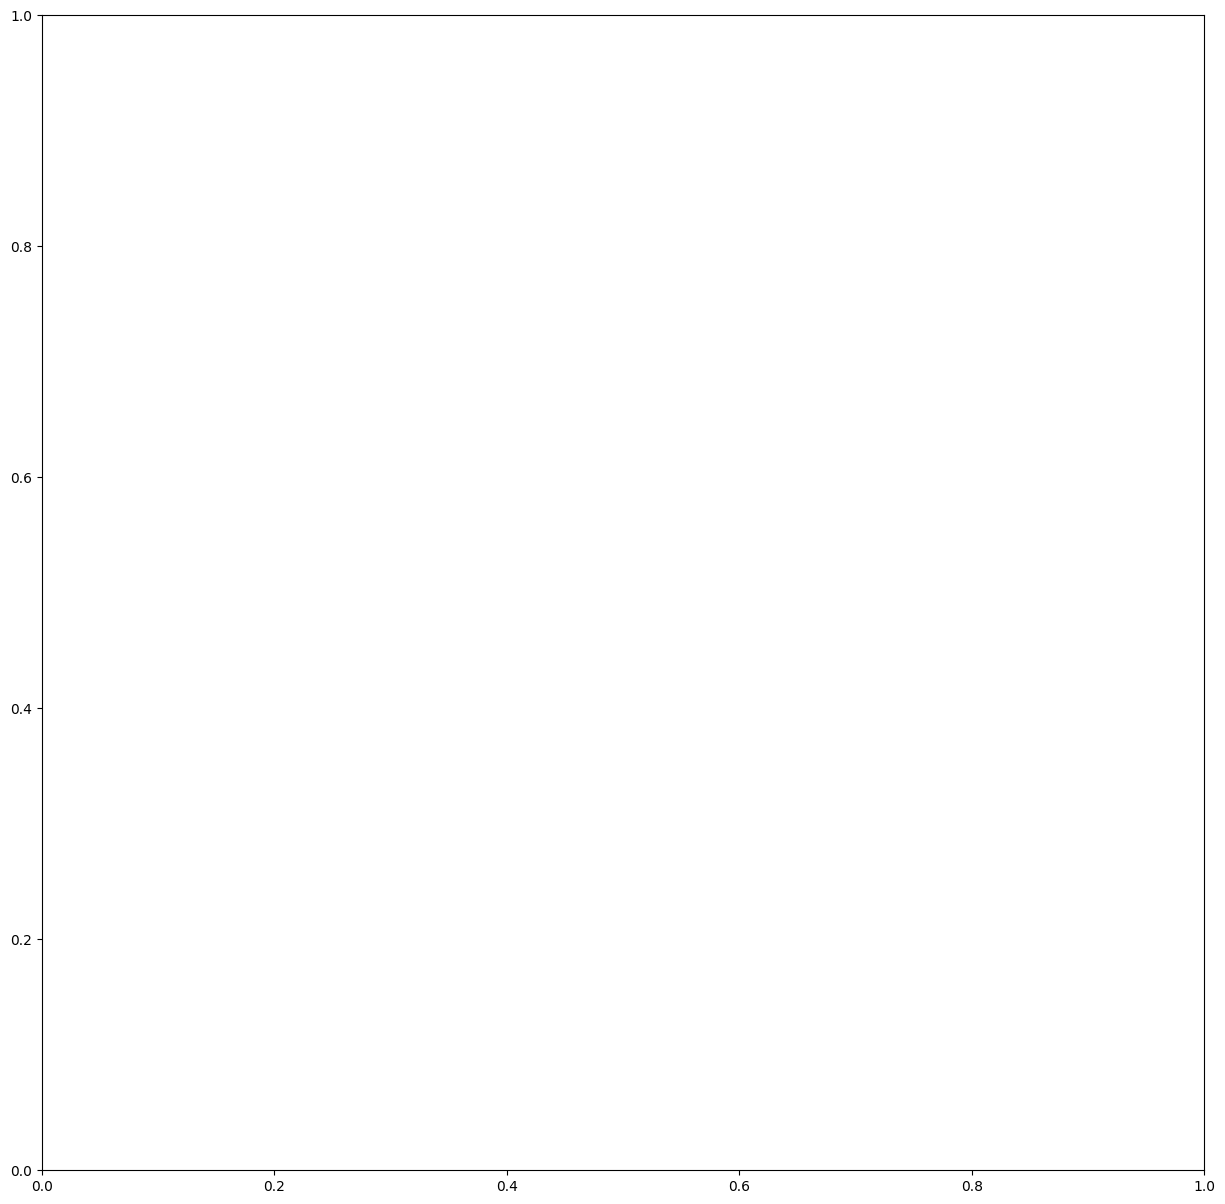

In [9]:

# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameters dictionary: params
params = {"objective":'reg:squarederror', 'max_depth':2}

# Train the model: xg_reg
xg_reg = xgb.train(dtrain=housing_dmatrix, params=params, num_boost_round=10)

# Plot the first tree
fig, ax = plt.subplots(figsize=(15, 15))
xgb.plot_tree(xg_reg, num_trees=0, ax=ax);

# Plot the fifth tree
fig, ax = plt.subplots(figsize=(15, 15))
xgb.plot_tree(xg_reg, num_trees=4, ax=ax);

# Plot the last tree sideways
fig, ax = plt.subplots(figsize=(15, 15))
xgb.plot_tree(xg_reg, rankdir="LR", num_trees=9, ax=ax);

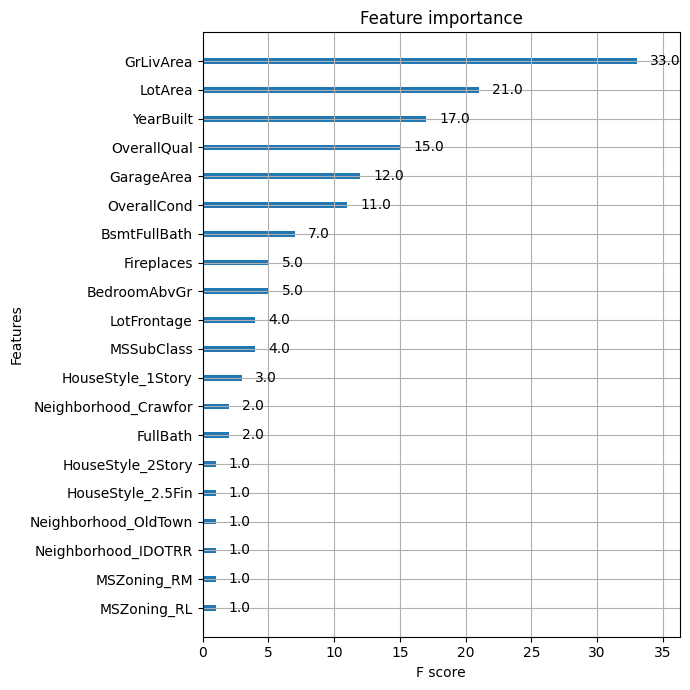

In [10]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:squarederror", "max_depth":4}

# Train the model: xg_reg
xg_reg = xgb.train(dtrain=housing_dmatrix, params=params, num_boost_round=10)

# Plot the feature importance
xgb.plot_importance(xg_reg);
plt.tight_layout()